<a href="https://colab.research.google.com/github/abrahammathews2000/search4cyberplanet/blob/main/ML_model/ML_model_gcolab_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import require libraries
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import save_model, load_model
import random

In [ ]:
# Upload lightcurve (input - x) and bezier shape (output - y)
# For 1000 shapes

# Size of input (lightcurve) = 500 points
# Size of outpute (bezier curve) = 32 x 32 pixels

x_dir  = '/content/drive/MyDrive/msAstroDataProject/lc_dict.npy'
x = np.load(x_dir)

y_dir  = '/content/drive/MyDrive/msAstroDataProject/shape_dict.npy'
y = np.load(y_dir)
y = y/255.0

In [ ]:
# Adding noise to the light curve

# np.random.seed(100100)
# stds = np.array([0.005,0.001,0.0005])
# X_Noise = []
# for el in x:
#     i = np.random.randint(0,len(stds),1)
#     noisearr = np.random.normal(1, stds[i], len(el))
#     X_Noise.append(np.multiply(el, noisearr))

# X_Noise = np.array(X_Noise)

In [ ]:
# Splitting dataset into Train and Test (80 - 20)

# xTrain, xTest, yTrain, yTest = train_test_split(X_Noise, y, test_size=0.20, random_state=1)
x_ML = x # x[-400:]
y_ML = y # y[-400:]
xTrain, xTest, yTrain, yTest = train_test_split(x_ML, y_ML, test_size=0.20, random_state=1)

print(xTrain.shape, xTest.shape, yTrain.shape, yTest.shape)

(800, 500) (200, 500) (800, 32, 32) (200, 32, 32)


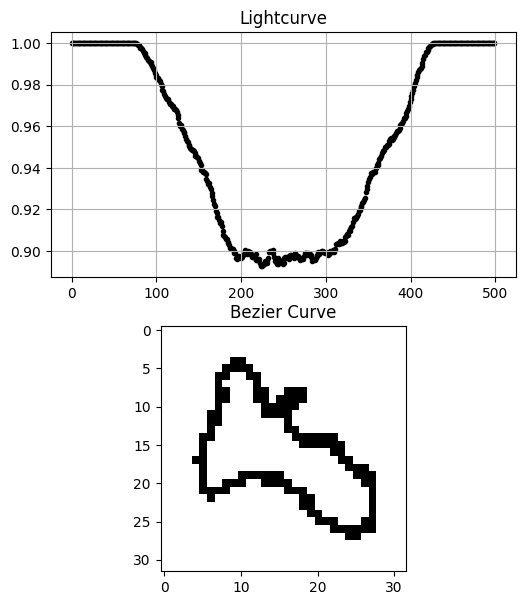

In [ ]:
# Plotting lightcurve (noise added) and corresponding bezier shape
# from the training dataset

plt.figure(figsize = (6,7))
plt.style.use('default')
plt.rcParams.update({'font.size': 10})

plt.figure(1)
plt.subplot(211)
plt.scatter(np.arange(len(xTrain[5])),xTrain[5],marker = '.',label = "Lightcurve",color="black")
plt.title("Lightcurve")
plt.grid()

plt.subplot(212)
plt.title("Bezier Curve")
plt.imshow(yTrain[5],label = "Bezier shape",cmap='gray')
# plt.grid()
plt.show()

In [ ]:
# Deep learning model (same as that used by Ushasi)


START = 500
END = 32
conv_ip = keras.layers.Input(shape=(START,),name='Input')
x=keras.layers.Reshape((START, 1), input_shape=(START,),name='reshape_1')(conv_ip)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Conv1D(16,kernel_size=3,strides=1,activation='relu',name='conv16_5', padding='same')(x)
x=keras.layers.Conv1D(16,kernel_size=3,strides=1,activation='relu',name='second_conv16_5', padding='same')(x)
x=keras.layers.MaxPool1D(3,strides=2,data_format='channels_last',name='maxpool_1', padding='same')(x) #400
x=keras.layers.Conv1D(32,kernel_size=3,strides=1,activation='relu',name='first_conv32_5', padding='same')(x)
x=keras.layers.Conv1D(32,kernel_size=3,strides=1,activation='relu',name='second_conv32_5', padding='same')(x)
x=keras.layers.MaxPool1D(3,strides=2,data_format='channels_last',name='maxpool_2', padding='same')(x) #200
x=keras.layers.Conv1D(64,kernel_size=3,strides=1,activation='relu',name='first_conv64_5', padding='same')(x)
x=keras.layers.Conv1D(64,kernel_size=3,strides=1,activation='relu',name='second_conv64_5', padding='same')(x)
x=keras.layers.MaxPool1D(3,strides=1,data_format='channels_last',name='maxpool_3', padding='same')(x) #100
x=keras.layers.Flatten(name='flat_1')(x)

x3=keras.layers.Dense(256,name='dense_layer_1',activation='relu')(x)
x3=keras.layers.Dense(256,name='dense_layer_2',activation='relu')(x3)

x3=keras.layers.Dense(END**2,name='dense_layer_u',activation='relu')(x3)
x3 = keras.layers.Reshape(target_shape=(END, END, 1),name='reshape_2')(x3)

x3=keras.layers.Conv2D(32,kernel_size=(3,3),strides=1,activation='relu',name='second_conv64_52', padding='same')(x3)
x3=keras.layers.Conv2D(32,kernel_size=(3,3),strides=1,activation='relu',name='second_conv64_522', padding='same')(x3)
x3=keras.layers.Conv2D(16,kernel_size=(3,3),strides=1,activation='relu',name='second_conv64_524', padding='same')(x3)
x3=keras.layers.Conv2D(1,kernel_size=3,strides=1,activation='relu',name='second_conv64_53', padding='same')(x3)
conv_op = keras.layers.Reshape(target_shape=(END, END),name='reshape_3')(x3)
model = keras.Model(inputs=conv_ip, outputs=conv_op, name="predict_shape_from_LC")
model.summary()


Model: "predict_shape_from_LC"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 500)]             0         
                                                                 
 reshape_1 (Reshape)         (None, 500, 1)            0         
                                                                 
 batch_normalization (BatchN  (None, 500, 1)           4         
 ormalization)                                                   
                                                                 
 conv16_5 (Conv1D)           (None, 500, 16)           64        
                                                                 
 second_conv16_5 (Conv1D)    (None, 500, 16)           784       
                                                                 
 maxpool_1 (MaxPooling1D)    (None, 250, 16)           0         
                                             

In [ ]:
# Deep learning model (same as that used by Ushasi)


# START = 500
# END = 32
# conv_ip = keras.layers.Input(shape=(START,),name='Input')
# x=keras.layers.Reshape((START, 1), input_shape=(START,),name='reshape_1')(conv_ip)
# x=keras.layers.BatchNormalization()(x)
# x=keras.layers.Conv1D(16,kernel_size=3,strides=1,activation='relu',name='conv16_5', padding='same')(x)
# x=keras.layers.Conv1D(16,kernel_size=3,strides=1,activation='relu',name='second_conv16_5', padding='same')(x)
# x=keras.layers.MaxPool1D(3,strides=2,data_format='channels_last',name='maxpool_1', padding='same')(x) #400
# x=keras.layers.Conv1D(32,kernel_size=3,strides=1,activation='relu',name='first_conv32_5', padding='same')(x)
# x=keras.layers.Conv1D(32,kernel_size=3,strides=1,activation='relu',name='second_conv32_5', padding='same')(x)
# x=keras.layers.MaxPool1D(3,strides=2,data_format='channels_last',name='maxpool_2', padding='same')(x) #200
# x=keras.layers.Conv1D(64,kernel_size=3,strides=1,activation='relu',name='first_conv64_5', padding='same')(x)
# x=keras.layers.Conv1D(64,kernel_size=3,strides=1,activation='relu',name='second_conv64_5', padding='same')(x)
# x=keras.layers.MaxPool1D(3,strides=1,data_format='channels_last',name='maxpool_3', padding='same')(x) #100
# x=keras.layers.Flatten(name='flat_1')(x)

# x3=keras.layers.Dense(256,name='dense_layer_1',activation='relu')(x)
# x3=keras.layers.Dense(256,name='dense_layer_2',activation='relu')(x3)

# x3=keras.layers.Dense(END**2,name='dense_layer_u',activation='relu')(x3)
# x3 = keras.layers.Reshape(target_shape=(END, END, 1),name='reshape_2')(x3)

# x3=keras.layers.Conv2D(32,kernel_size=(3,3),strides=1,activation='relu',name='second_conv64_52', padding='same')(x3)
# x3=keras.layers.Conv2D(32,kernel_size=(3,3),strides=1,activation='relu',name='second_conv64_522', padding='same')(x3)
# x3=keras.layers.Conv2D(16,kernel_size=(3,3),strides=1,activation='relu',name='second_conv64_524', padding='same')(x3)
# x3=keras.layers.Conv2D(1,kernel_size=3,strides=1,activation='relu',name='second_conv64_53', padding='same')(x3)
# conv_op = keras.layers.Reshape(target_shape=(END, END),name='reshape_3')(x3)
# model = keras.Model(inputs=conv_ip, outputs=conv_op, name="predict_shape_from_LC")
# model.summary()

In [ ]:
# model = tf.keras.models.Sequential([
#     keras.layers.Dense(units=5000, input_shape=[500]),
#     tf.keras.layers.Dense(10000, activation=tf.nn.relu),
#     tf.keras.layers.Dense(10000, activation=tf.nn.relu),
#     tf.keras.layers.Dense(10000, activation=tf.nn.relu),
#     tf.keras.layers.Dense(10000, activation=tf.nn.relu),
#     tf.keras.layers.Dense(10000, activation=tf.nn.relu),
#     tf.keras.layers.Dense(1024, activation=tf.nn.relu),
#     tf.keras.layers.Reshape((32, 32))])
# model.summary()

In [ ]:
# Compiling model

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='mse') # loss = 0.08
# model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss=tf.keras.losses.MeanAbsoluteError()) #  loss = 0.1
#model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss=tf.keras.losses.huber()) #  loss =


In [ ]:
#Patience early stopping
# es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)


In [ ]:
# Train the model

history = model.fit(xTrain, yTrain, epochs=5000,verbose=2, validation_split=0.2) #,callbacks=[es])


Streaming output truncated to the last 5000 lines.
Epoch 2501/5000
20/20 - 0s - loss: 0.0289 - val_loss: 0.1327 - 163ms/epoch - 8ms/step
Epoch 2502/5000
20/20 - 0s - loss: 0.0273 - val_loss: 0.1359 - 171ms/epoch - 9ms/step
Epoch 2503/5000
20/20 - 0s - loss: 0.0256 - val_loss: 0.1340 - 179ms/epoch - 9ms/step
Epoch 2504/5000
20/20 - 0s - loss: 0.0267 - val_loss: 0.1358 - 173ms/epoch - 9ms/step
Epoch 2505/5000
20/20 - 0s - loss: 0.0246 - val_loss: 0.1348 - 177ms/epoch - 9ms/step
Epoch 2506/5000
20/20 - 0s - loss: 0.0247 - val_loss: 0.1333 - 165ms/epoch - 8ms/step
Epoch 2507/5000
20/20 - 0s - loss: 0.0265 - val_loss: 0.1336 - 173ms/epoch - 9ms/step
Epoch 2508/5000
20/20 - 0s - loss: 0.0252 - val_loss: 0.1369 - 172ms/epoch - 9ms/step
Epoch 2509/5000
20/20 - 0s - loss: 0.0265 - val_loss: 0.1320 - 183ms/epoch - 9ms/step
Epoch 2510/5000
20/20 - 0s - loss: 0.0254 - val_loss: 0.1334 - 172ms/epoch - 9ms/step
Epoch 2511/5000
20/20 - 0s - loss: 0.0243 - val_loss: 0.1315 - 206ms/epoch - 10ms/step
Ep

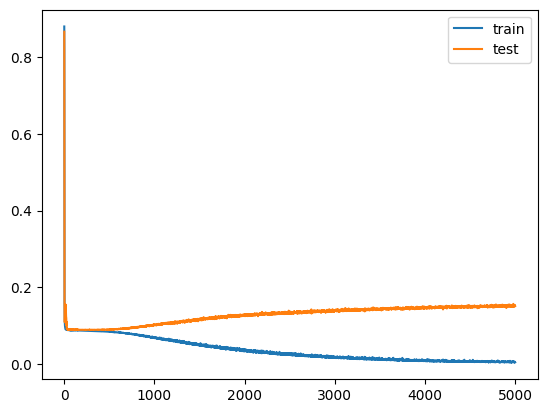

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
# Evaluating model on Test dataset

model.evaluate(xTest, yTest)

7/7 [==============================] - 1s 50ms/step - loss: 0.1529


0.15287774801254272

In [ ]:
# Trying to predict shape for
# 1. Test data set
# 2. Train data set
# 1. Test data set
yPredictonTest = model.predict(xTest)
yPredictonTrain = model.predict(xTrain)


25/25 [==============================] - 0s 3ms/step


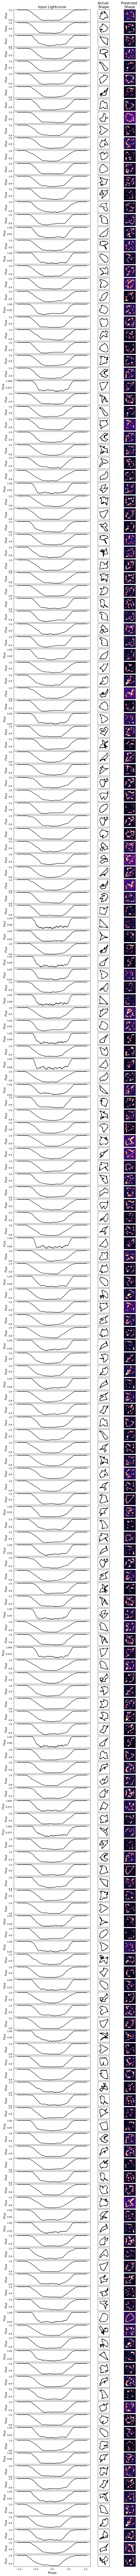

In [ ]:
# Test dataset

num = 200
fig,ax=plt.subplots(num,3, figsize=(10,200), gridspec_kw={ 'width_ratios': [3,1,1],
        'wspace': 0.01,'hspace': 0.1})

ax[0][1].set_title('Actual \nShape',size=15)
ax[0][0].set_title('Input Lightcurve',size=15)
ax[0][2].set_title('Predicted \nShape',size=15)
ax[num-1][0].set_xlabel('Phase',size=13)
ph = np.linspace(-1.047,1.047,len(xTest[0]))
advance = 60
for i in range(num):
    k = random.randint(0, len(xTest)-1)
    ax[i][2].tick_params(left = False, right = False , labelleft = False ,labelbottom = False, bottom = False)
    ax[i][1].tick_params(left = False, right = False , labelleft = False ,labelbottom = False, bottom = False)
    if(i<num-1): ax[i][0].tick_params(labelbottom = False, bottom = False)
    ax[i][1].imshow(yTest[k],cmap='gray')
    ax[i][0].set_ylabel('Flux',size=13)
    ax[i][0].plot(ph, xTest[k],color = 'black')
    ax[i][2].imshow(yPredictonTest[k],cmap='magma_r')

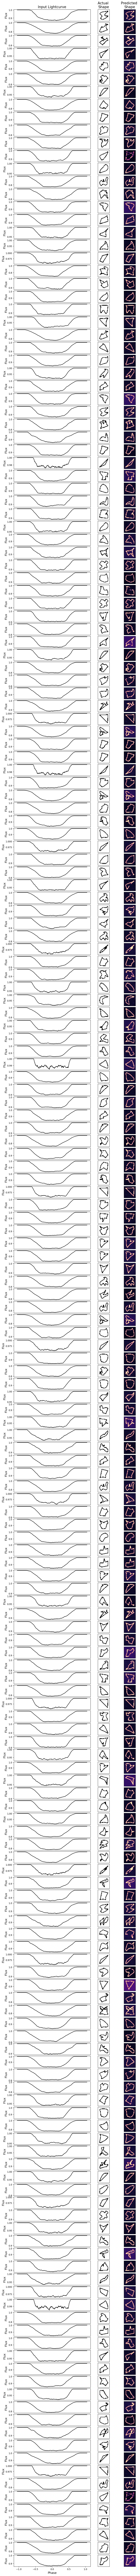

In [ ]:
# Train dataset

num = 200
fig,ax=plt.subplots(num,3, figsize=(10,200), gridspec_kw={ 'width_ratios': [3,1,1],
        'wspace': 0.01,'hspace': 0.1})

ax[0][1].set_title('Actual \nShape',size=15)
ax[0][0].set_title('Input Lightcurve',size=15)
ax[0][2].set_title('Predicted \nShape',size=15)
ax[num-1][0].set_xlabel('Phase',size=13)
ph = np.linspace(-1.047,1.047,len(xTrain[0]))
advance = 60
for i in range(num):
    k = random.randint(0,  len(xTest))
    ax[i][2].tick_params(left = False, right = False , labelleft = False ,labelbottom = False, bottom = False)
    ax[i][1].tick_params(left = False, right = False , labelleft = False ,labelbottom = False, bottom = False)
    if(i<num-1): ax[i][0].tick_params(labelbottom = False, bottom = False)
    ax[i][1].imshow(yTrain[k],cmap='gray')
    ax[i][0].set_ylabel('Flux',size=13)
    ax[i][0].plot(ph, xTrain[k],color = 'black')
    ax[i][2].imshow(yPredictonTrain[k],cmap='magma_r')

In [ ]:
num = 10
fig,ax=plt.subplots(num,3, figsize=(10,20), gridspec_kw={ 'width_ratios': [3,1,1],
        'wspace': 0.01,'hspace': 0.1})

ax[0][1].set_title('Actual \nShape',size=15)
ax[0][0].set_title('Input Lightcurve',size=15)
ax[0][2].set_title('Predicted \nShape',size=15)
ax[num-1][0].set_xlabel('Phase',size=13)
ph = np.linspace(-1.047,1.047,len(x[0]))
advance = 60
for i in range(num):
    k = random.randint(0, 1000)
    ax[i][2].tick_params(left = False, right = False , labelleft = False ,labelbottom = False, bottom = False)
    ax[i][1].tick_params(left = False, right = False , labelleft = False ,labelbottom = False, bottom = False)
    if(i<num-1): ax[i][0].tick_params(labelbottom = False, bottom = False)
    ax[i][1].imshow(yTest[k],cmap='gray')
    ax[i][0].set_ylabel('Flux',size=13)
    ax[i][0].plot(ph, xTest[k],color = 'black')
    ax[i][2].imshow(yPredictonTest[k],cmap='magma_r')

In [ ]:
# 1. Test data set
plt.figure(figsize = (6,10))
plt.style.use('default')
plt.rcParams.update({'font.size': 10})

plt.figure(1)
plt.subplot(311)
plt.scatter(np.arange(len(xTest[10])),xTest[10],marker = '.',label = "Lightcurve",color="black")
plt.title("Lightcurve")
plt.grid()

plt.subplot(312)
plt.title("Actual Bezier Curve")
plt.imshow(yTest[10],cmap='magma_r')

plt.subplot(313)
plt.title("Predicted Bezier Curve")
plt.imshow(yPredictonTest[10],cmap='magma_r')

plt.show()

In [ ]:
# 2. Train data set
plt.figure(figsize = (6,10))
plt.style.use('default')
plt.rcParams.update({'font.size': 10})

plt.figure(1)
plt.subplot(311)
plt.scatter(np.arange(len(xTrain[10])),xTrain[10],marker = '.',label = "Lightcurve",color="black")
plt.title("Lightcurve")
plt.grid()

plt.subplot(312)
plt.title("Actual Bezier Curve")
plt.imshow(yTrain[10],cmap='gray')

plt.subplot(313)
plt.title("Predicted Bezier Curve")
plt.imshow(yPredictonTrain[10],cmap='gray')

plt.show()

**Run below code to save the trained model**

In [ ]:
from tensorflow.keras.models import save_model, load_model

In [ ]:
save_model(model, "model_june21_v2.h5")

In [ ]:
model_upload = load_model('model_june20_v2.h5')
# summarize model.
model_upload.summary()

Model: "predict_shape_from_LC"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 500)]             0         
                                                                 
 reshape_1 (Reshape)         (None, 500, 1)            0         
                                                                 
 batch_normalization (BatchN  (None, 500, 1)           4         
 ormalization)                                                   
                                                                 
 conv16_5 (Conv1D)           (None, 500, 16)           64        
                                                                 
 second_conv16_5 (Conv1D)    (None, 500, 16)           784       
                                                                 
 maxpool_1 (MaxPooling1D)    (None, 250, 16)           0         
                                             

In [ ]:
yPredictonTest = model_upload.predict(xTest)

7/7 [==============================] - 0s 3ms/step


In [ ]:
j = 60
plt.figure(figsize = (6,10))
plt.style.use('default')
plt.rcParams.update({'font.size': 10})

plt.figure(1)
plt.subplot(311)
plt.scatter(np.arange(len(xTest[j])),xTest[j],marker = '.',label = "Lightcurve",color="black")
plt.title("Lightcurve")
plt.grid()

plt.subplot(312)
plt.title("Actual Bezier Curve")
plt.imshow(yTest[j],cmap='gray')

plt.subplot(313)
plt.title("Predicted Bezier Curve")
plt.imshow(yPredictonTest[j],cmap='gray')

plt.show()

In [ ]:
# 2. Train data set

yPredictonTrain = model_upload.predict(xTrain)


25/25 [==============================] - 0s 3ms/step


In [ ]:
# 2. Train data set

k=50

plt.figure(figsize = (6,10))
plt.style.use('default')
plt.rcParams.update({'font.size': 10})

plt.figure(1)
plt.subplot(311)
plt.scatter(np.arange(len(xTrain[k])),xTrain[k],marker = '.',label = "Lightcurve",color="black")
plt.title("Lightcurve")
plt.grid()

plt.subplot(312)
plt.title("Actual Bezier Curve")
plt.imshow(yTrain[k],cmap='magma_r')

plt.subplot(313)
plt.title("Predicted Bezier Curve")
plt.imshow(yPredictonTrain[k],cmap='magma_r')

plt.show()

In [ ]:
num = 4
fig,ax=plt.subplots(num,3, figsize=(20,20), gridspec_kw={ 'width_ratios': [3,1,1],
        'wspace': 0.01,'hspace': 0.1})

ax[0][1].set_title('Actual \nShape',size=15)
ax[0][0].set_title('Input Lightcurve',size=15)
ax[0][2].set_title('Predicted \nShape',size=15)
ax[num-1][0].set_xlabel('Phase',size=13)
ph = np.linspace(-1.047,1.047,len(xTest[0]))
advance = 60
for i in range(num):
    ax[i][2].tick_params(left = False, right = False , labelleft = False ,labelbottom = False, bottom = False)
    ax[i][1].tick_params(left = False, right = False , labelleft = False ,labelbottom = False, bottom = False)
    if(i<num-1): ax[i][0].tick_params(labelbottom = False, bottom = False)
    ax[i][1].imshow(y[i+10],cmap='gray')
    ax[i][0].set_ylabel('Flux',size=13)
    ax[i][0].plot(ph, xTest[i+advance])
    ax[i][2].imshow(yPredictonTest[i+advance],cmap='magma_r')